In [44]:
import numpy as np
import pandas as pd

In [45]:
dataset=pd.read_csv('wines_SPA.csv')

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [47]:
dataset.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [48]:
dataset.dtypes

,0
winery,object
wine,object
year,object
rating,float64
num_reviews,int64
country,object
region,object
price,float64
type,object
body,float64


In [49]:
num_columns=['num_reviews','rating','price','body','acidity']

In [50]:
dataset=dataset[num_columns]

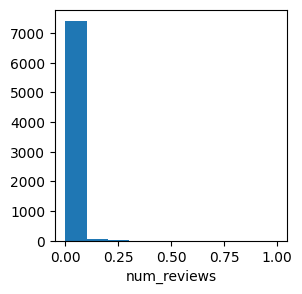

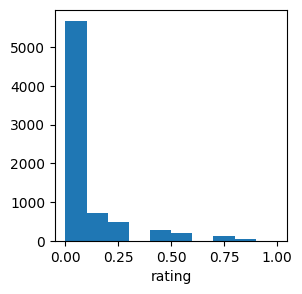

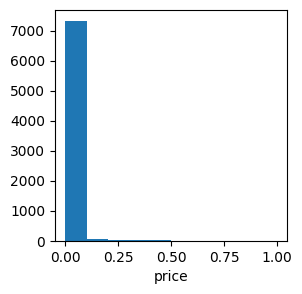

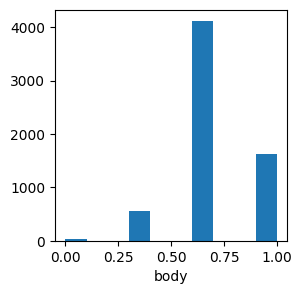

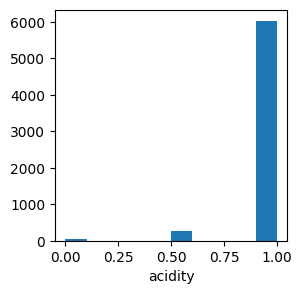

In [60]:
import matplotlib.pyplot as plt
for cols in num_columns:
    plt.fig=plt.figure(figsize=(3,3))
    plt.hist(dataset[cols])
    plt.xlabel(cols)
    plt.show()

In [56]:
#After Min-MaxScaling
scaler=MinMaxScaler()
datast_min_max=dataset.copy()
datast_min_max[num_columns]=scaler.fit_transform(dataset[num_columns])

In [57]:
datast_min_max.head()

,num_reviews,rating,price,body,acidity
0,0.001012,1.000000,0.317913,1.000000,1.0
1,0.000184,1.000000,0.099069,0.666667,0.5
2,0.054235,0.857143,0.102746,1.000000,1.0
3,0.051535,0.857143,0.220922,1.000000,1.0
4,0.039388,0.857143,0.248249,1.000000,1.0


In [58]:
#Using Standard Scaling
scaler=StandardScaler()
datast_standard=dataset.copy()
datast_standard[num_columns]=scaler.fit_transform(dataset[num_columns])

In [59]:
datast_standard.head()

,num_reviews,rating,price,body,acidity
0,-0.543754,5.465686,6.218324,1.442764,0.215116
1,-0.581101,5.465686,1.685466,-0.271601,-3.814178
2,1.856123,4.618381,1.761623,1.442764,0.215116
3,1.734400,4.618381,4.209367,1.442764,0.215116
4,1.186647,4.618381,4.775392,1.442764,0.215116
